# Project: Credit Card Fraud Detection


This project uses the `Credit Card Fraud Detection dataset` which contains credit card transactions made by cardholders  It comprises **over 2,84,808 records**, and the data has been anonymized to protect the cardholders' identities. The primary objective of this dataset is to facilitate the development of fraud detection algorithms and models to identify potentially fraudulent transactions.

Key Features:
- `Time` : Unique identifier for each transaction
- `V1-V28` : Anonymized features representing various transaction attributes (e.g., time, location, etc.)
- `Amount` : The transaction amount
- `Class` : Binary label indicating whether the transaction is fraudulent (1) or not (0)

Data set: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud



In [1]:
# Data Wrangling
import pandas as pd
import numpy as np

#Statistics / Logistic Regression 
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from scipy import stats

#Cross Validation
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#Confusion Matrix
from sklearn.metrics import confusion_matrix

#Plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

#Trees
from sklearn import tree
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier

#Scores
from sklearn.metrics import accuracy_score, precision_score, recall_score

#Model turning
from sklearn.model_selection import GridSearchCV

RANDOM_STATE=42
%matplotlib inline

### Load Dataset & Get Overview of the Data

In [2]:
credit_original_data = pd.read_csv("../Data/creditcard.csv")
credit_original_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [3]:
cc_data = credit_original_data.copy()
cc_data.info()
cc_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    279548 non-null  float64
 1   V1      279548 non-null  float64
 2   V2      279548 non-null  float64
 3   V3      279548 non-null  float64
 4   V4      279548 non-null  float64
 5   V5      279548 non-null  float64
 6   V6      279548 non-null  float64
 7   V7      279548 non-null  float64
 8   V8      279548 non-null  float64
 9   V9      279548 non-null  float64
 10  V10     279548 non-null  float64
 11  V11     279548 non-null  float64
 12  V12     279548 non-null  float64
 13  V13     279548 non-null  float64
 14  V14     279548 non-null  float64
 15  V15     279548 non-null  float64
 16  V16     279548 non-null  float64
 17  V17     279548 non-null  float64
 18  V18     279548 non-null  float64
 19  V19     279548 non-null  float64
 20  V20     279548 non-null  float64
 21  V21     27

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,279548.000000,279548.000000,279548.000000,279548.000000,279548.000000,279548.000000,279548.000000,279548.000000,279548.000000,279548.000000,...,279548.000000,279548.000000,279548.000000,279548.000000,279564.000000,279564.000000,279564.000000,279564.000000,279564.000000,279564.000000
mean,94238.880740,-0.001105,0.000861,0.011648,-0.000416,-0.006481,0.001877,-0.003232,0.003064,-0.005847,...,-0.000301,-0.001933,-0.000528,0.000533,0.002127,0.000506,0.000088,-0.000280,88.182077,0.001728
std,47640.488477,1.947376,1.640196,1.512001,1.410994,1.376153,1.330701,1.231012,1.191673,1.095222,...,0.730502,0.723847,0.619581,0.605386,0.519881,0.482212,0.402684,0.324526,248.904313,0.041530
min,0.000000,-56.407510,-72.715728,-48.325589,-5.683171,-113.743307,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.836627,-10.295397,-2.604551,-22.565679,-15.430084,0.000000,0.000000
25%,53623.000000,-0.920902,-0.598557,-0.873182,-0.847508,-0.696947,-0.766204,-0.555381,-0.206537,-0.646240,...,-0.228052,-0.542189,-0.161857,-0.354036,-0.314660,-0.326856,-0.070547,-0.052523,5.580000,0.000000
50%,83437.500000,0.017917,0.065254,0.192938,-0.017136,-0.060953,-0.272346,0.037480,0.023924,-0.054471,...,-0.030019,0.004499,-0.011778,0.041689,0.020218,-0.052878,0.001562,0.011633,22.000000,0.000000
75%,138439.250000,1.308566,0.802547,1.035671,0.746727,0.604536,0.399654,0.566489,0.328849,0.589601,...,0.185414,0.523903,0.146351,0.438878,0.352059,0.241345,0.090914,0.078158,77.150000,0.000000
max,172792.000000,2.454930,22.057729,9.382558,16.875344,34.801666,73.301626,120.589494,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.584549,7.519589,3.517346,31.612198,33.847808,25691.160000,1.000000


## Significant Variables

Based on the logistic regression, the Z-scores for the coefficients of the variables `V1` through `V28` (excluding `V5`) are greater than 2, which indicates that these variables have a relatively strong and statistically significant impact on predicting the `Class` (i.e., whether or not a transaction is frauduelent). 
`V5` and `Amount` have Z-scores with a magnitude less than 2, which suggests that these variable may not have as strong a predictive impact, or it may not be statistically significant in predicting `Class`.

However, since there are a large amount of independent variables (without strong theoretical justification), this can lead to overfitting.

In [4]:
#perform logistic regression using glm (generalized linear model) method
logit_equation = 'Class~V1+V2+V3+V4+V5+V6+V7+V8+V9+V10+V11+V12+V13+V14+V15+V16+V17+V18+V19+V20+V21+V22+V23+V24+V25+V26+V27+V28+Amount'
fit1 = smf.glm(logit_equation, data=cc_data, family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:               279548
Model:                            GLM   Df Residuals:                   279518
Model Family:                Binomial   Df Model:                           29
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1092.9
Date:                Fri, 02 Jan 2026   Deviance:                       2185.9
Time:                        20:59:22   Pearson chi2:                 6.78e+05
No. Iterations:                    12   Pseudo R-squ. (CS):            0.01746
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.7440      0.153    -57.099      0.0


## For simplicity and to avoid overfitting, lets only focus on `V1-V-5`, `Amount`, and `Class` to perform our analysis on.


In [6]:
# Columns to keep
target_columns = ['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'Amount', 'Class']

# Create a new DataFrame with the selected columns
cc_data = cc_data[target_columns]
cc_data.head()

,Time,V1,V2,V3,V4,V5,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,69.99,0.0


## Distribution of V1-V5 and Amount

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

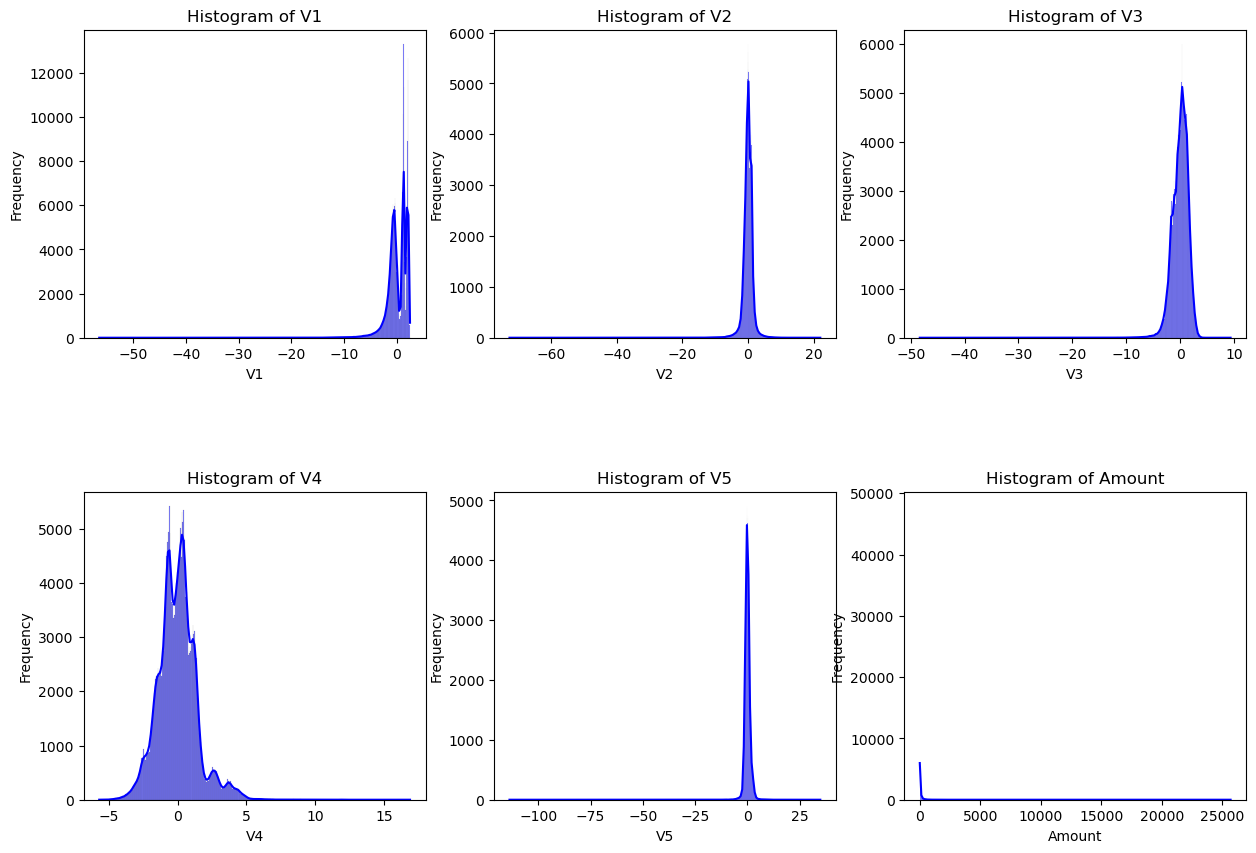

In [7]:
# Define the columns you want to plot
columns_to_plot = ['V1', 'V2', 'V3', 'V4', 'V5', 'Amount']

# Create subplots for the histograms
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)

for i, col in enumerate(columns_to_plot):
    row_idx = i // 3
    col_idx = i % 3

    sns.histplot(data=cc_data, x=col, kde=True, color='blue', ax=axes[row_idx, col_idx])
    axes[row_idx, col_idx].set_title(f'Histogram of {col}')
    axes[row_idx, col_idx].set_xlabel(col)
    axes[row_idx, col_idx].set_ylabel('Frequency')

# Remove empty subplots, if any
for i in range(len(columns_to_plot), 2 * 3):
    fig.delaxes(axes.flatten()[i])

plt.show()

## Distribution of Fraudulent Transactions in Dataset

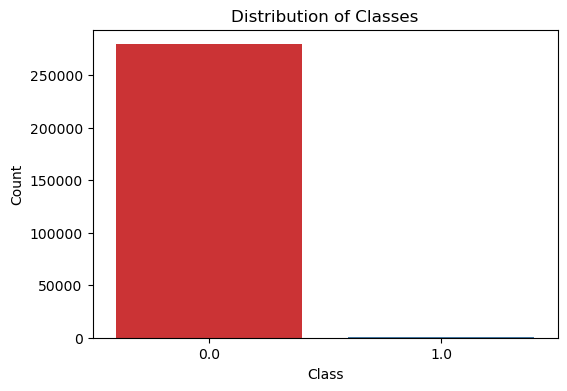

Count of Fraudulent Transactions: 483
Count of Non-Fraudulent Transactions: 279081


In [8]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Class', data=cc_data, palette='Set1')
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

fraud_count = (cc_data['Class']==1).sum()
nonfraud_count = (cc_data['Class']==0).sum()
print("Count of Fraudulent Transactions:", fraud_count)
print("Count of Non-Fraudulent Transactions:", nonfraud_count)

## Significant Variables Revised

We see that with fewer independent variables in the binary logistic regression model, `V5` is now a statistically significant variable, as evidenced by its Z-score magnitude greater than 2. Additionally, `V1` through `V4` also continue to exhibit statistically significant Z-scores.

However, `Amount` remains a statistically insignificant variable for predicting fraudulent transactions, as its Z-score does not exceed the threshold of 2.

#### Negative Coefficients (`V1`, `V3`, `V5`):
When a coefficient is negative, it indicates an inverse relationship between the corresponding independent variable and the log-odds of the outcome.

Which means that as the values of `V1`, `V3`, and `V5` increases, the log-odds of a transaction being fraudulent (`Class` = 1) decrease. In other words, **higher values of `V1`, `V3`, and `V5`** are associated with a **lower likelihood of a fraudulent transaction**.

#### Positive Coefficients (`V2`, `V4`): 
Positive coefficients indicate a direct relationship between the independent variable and the log-odds of the outcome. 

Which means that as the values of `V2` and `V4` increases, the log-odds of a transaction being fraudulent (`Class` = 1) increase. **Higher values of `V2` and `V4`** are associated with a **higher likelihood of a fraudulent transaction**.

In [9]:
#perform logistic regression using glm (generalized linear model) method.
#Note, we leave out Amount as it isn't statistically significant
logit_eq = 'Class~V1+V2+V3+V4+V5'
fit1 = smf.glm(logit_eq, data=cc_data, family=sm.families.Binomial()).fit()
print(fit1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  Class   No. Observations:               284807
Model:                            GLM   Df Residuals:                   284801
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1813.4
Date:                Tue, 16 Dec 2025   Deviance:                       3626.7
Time:                        18:33:47   Pearson chi2:                 2.80e+05
No. Iterations:                    11   Pseudo R-squ. (CS):            0.01262
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -8.2857      0.103    -80.783      0.0

## Cross Validation of our Model
Using the validation set approach, we estimate the test error of this model.
- Split the sample set into a random training set and a random validation set. Use a test size of 20%
- Store the training set in <b>train</b>, testing set in <b>test</b>


In [10]:
#split data into training and validation/test set
train, test = train_test_split(cc_data, test_size=0.2, random_state = 42)

#Fit logistic regression model with training set
fit2 = smf.glm(logit_eq, data=train, family=sm.families.Binomial()).fit()

- Obtain a prediction of 'default' for each individual in the test set by computing the probability of default for that individual and classifying the individual to the default category if the posterior probability is greater than or equal to 0.5 (a Bayesian classifier). Store your predictions in **predicted**.

- Compute the misclassification rate, which is the fraction of the observations in the validation set that are misclassified. Name this variable `mis_rate` and. 

In [11]:
#Make predictions on the validation set with the new model
predictions = fit2.predict(test)

#Convert predicted probabilities to binary predictions: 1 if prob>0.5
encode = lambda x: 1 if x>=0.5 else 0
predicted = predictions.map(encode)

# compare the predicted values with the actual values in the test set
misclassified = (predicted != test['Class']).sum()

mis_rate = misclassified/len(test)
print("Our model has a misclassifcation rate of:", mis_rate*100, "%")

Our model has a misclassifcation rate of: 0.1316667251852112 %


## Confusion Matrix

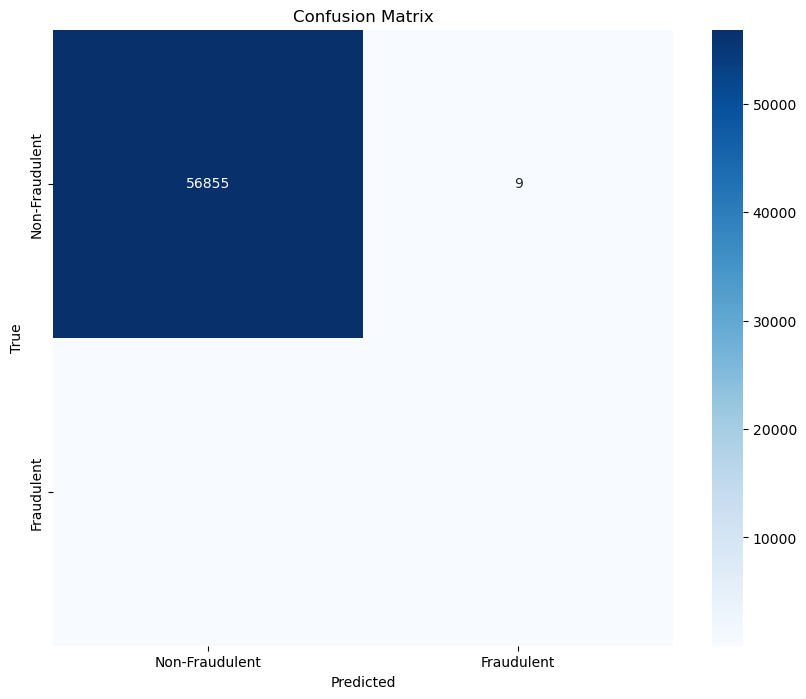

In [12]:
true_labels = test['Class']
cm = confusion_matrix(true_labels, predicted)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Fraudulent', 'Fraudulent'], yticklabels=['Non-Fraudulent', 'Fraudulent'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

### Results
The result obtained indicates that there are 7,611 misclassified instances in the test set, and the misclassification rate is approximately 0.0669 (or 6.69%). This means that about 6.69% of the predictions made by your model on the test data are incorrect.

Lets repeat this process three more times, using three different splits of the observations into a training set and a validation set. 
- Use test sizes of $10\%$, $30\%$, and $50\%$. 
- Name the misclassification rates `mis_rate_10`, `mis_rate_30`, `mis_rate50`, respectively. 
- Store the misclassification accuracy score for each model within <b>model_rates</b> and model parameters within <b>model_params</b>

In [13]:
test_sizes = [0.1, 0.3, 0.5]
#to store the misclassification accuracy score for each model
model_rates = []
#to store the model parameters
model_params = []

#iterate through each test size
for test_size in test_sizes:
    
    #split data into training and validation sets
    train, test = train_test_split(cc_data, test_size=test_size, random_state = 42)
    
    #fit the logistic regression model on training set
    model = smf.glm(logit_eq, data=train, family=sm.families.Binomial()).fit()
    
    #Store model parameters
    model_params.append(model.params)
    
    #Get predictions on test/validation test
    predicted_probs = model.predict(test)
    
    #Classifdy predictions on 0.5 threshold
    predicted = predicted_probs.map(encode)
    
    #Calculate misclassification rate & store rates
    misclassified = (predicted != test['Class']).sum()
    mis_rate = misclassified / len(test)
    model_rates.append(mis_rate)

#Store misclassification rates in designated variables
mis_rate_10, mis_rate_30, mis_rate_50 = model_rates

In [14]:
print(f"Misclassification Rate for 10% Test Size:", mis_rate_10*100, "%")
print(f"Misclassification Rate for 30% Test Size:", mis_rate_30*100, "%")
print(f"Misclassification Rate for 50% Test Size:", mis_rate_50*100, "%")

Misclassification Rate for 10% Test Size: 0.11937783083459147 %
Misclassification Rate for 30% Test Size: 0.11703708905352107 %
Misclassification Rate for 50% Test Size: 0.12078312406954861 %


## K-Fold Cross Validation, K=10
Using KFold cross validation with 10 folds across 10 trials to further test our model, we calculate the <b>average</b> misclassification rate. 
- Name this `mis_rate_kfold`.

The average misclassification rate of 0.0662 suggests that, on average, the model is making correct predictions for approximately 93.38% of the data points, which is a reasonable level of performance.

In [15]:
#Store all miclassification rates
misclass_rates = []

model = LogisticRegression() #Define ML Model

for trial in range(10):
    #Define cross-value method
    cv_method = KFold(n_splits = 10, shuffle=True, random_state = trial)
    
    #perform cv and get accuracy scores for each fold
    scores = cross_val_score(model, cc_data[['V1','V2','V3','V4','V5']], cc_data['Class'], cv=cv_method, scoring ='accuracy')
    
    #calculate misclassification rate for each fold
    misclass_rate = 1 - scores
    misclass_rates.extend(misclass_rate)
    
mis_rate_kfold =sum(misclass_rates) / len(misclass_rates)
print(mis_rate_kfold)

0.0012699827925890972


# Project Summary So Far

## Logistic Regression Modeling:
- Conducted logistic regression analysis to build a predictive model for fraud detection.
- Investigated the significance of individual features ('V1' to 'V28' and 'Amount') by examining Z-scores and p-values.
- Iteratively built and evaluated logistic regression models with different subsets of features and test sizes, assessing their misclassification rates.

## K-Fold Cross Validation:
- Employed 10-fold cross-validation across 10 trials to estimate the average misclassification rate of your logistic regression model.
- Calculated the average misclassification rate as a measure of model performance across different subsets of the data.

## Key Findings:
- The model's performance, as measured by the misclassification rate, varied based on the choice of features and test sizes.
- Specific features, such as 'V5,' demonstrated varying levels of significance depending on the model configuration.
- Average misclassification rates across K-Fold Cross Validation suggest the model's performance in correctly classifying transactions as fraudulent or non-fraudulent.
- We averaged a ~6.66% classification rate for fraudulent credit-card transactions using `V1-V5`.

## Next Steps:
- Explore advanced techniques such as ensemble methods (e.g., **Bagging and Random Forest**) for improved fraud detection and hyperparameter tuning.

In [16]:
#Get get original dataset
cc_data = credit_original_data.copy()
cc_data = cc_data.drop(columns = ['Time', 'Amount'])

cc_data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


In [17]:
# Calculate pairwise correlations
corr_matrix = cc_data.corr()
# Find the correlation of 'HD' with all predictor variables
corr_HD = corr_matrix['Class']

# Find the predictor with the highest positive correlation
highest_corr = corr_HD.drop('Class').idxmax()

print(f"The feature that has the highest correlation with Credit Card Fraud is: {highest_corr}")

The feature that has the highest correlation with Credit Card Fraud is: V11


## Splitting Training & Test Data

In [18]:
X = cc_data.drop('Class', axis=1) # All predictor variables
y = cc_data['Class'] # Target Output

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Bootstrap Aggregation (Bagging) 
- Using all predictor variables (`V1-V28`), train a base model to predict Credit Card Fraud

In [19]:
# Create Bagging Classifier
bag = BaggingClassifier(random_state=42)

# Train Bagging Classifier
bag.fit(X_train, y_train)

BaggingClassifier(random_state=42)

In [20]:
# Make Predictions using BagClassifier on test data
y_pred = bag.predict(X_test)

# Calculate Precision, Recall, and Accuracy Scores
bag_precision = precision_score(y_test, y_pred)
bag_recall = recall_score(y_test, y_pred)
bag_accuracy = accuracy_score(y_test, y_pred)

print(f"Bagging Classifier - Precision: {bag_precision}")
print(f"Bagging Classifier - Recall: {bag_recall}")
print(f"Bagging Classifier - Accuracy: {bag_accuracy}")

Bagging Classifier - Precision: 0.9625
Bagging Classifier - Recall: 0.7857142857142857
Bagging Classifier - Accuracy: 0.9995786664794073


In [21]:
bag_misclass_rate = (1 - bag_accuracy)*100
print(f"Bagging misclassification rate: {bag_misclass_rate:.2f}%")

Bagging misclassification rate: 0.04%


## Tuning Bagging
- Tuning may not be necessary since our precision, recall, and accuracy scores are already favorable.
- However, below is an implementation on how we can tune using GridSearchCV with 10-fold CV if needed

In [31]:
"""
# Define the hyperparameter grid to search through (range 5 to 29)
params = {'n_estimators': range(5, 30)}

# Create GridSearchCV with 10-Fold CV
grid_search = GridSearchCV(bag, params, cv=10, scoring='accuracy')

# Fit GridSearchCV to training data
grid_search.fit(X_train, y_train)

# Get best estimator with tuned paramters
best_bag = grid_search.best_estimator_

# Make predictions on training data
y_pred = best_bag.predict(X_test)

bag_tuned_precision = precision_score(y_test, y_pred)
bag_tuned_recall = recall_score(y_test, y_pred)
bag_tuned_accuracy = accuracy_score(y_test, y_pred)

# Store best performing # of estimators
#number = best_bag.n_estimators
bag_best_param = {'n_estimators': best_bag.n_estimators}

print(f"Tuned Bagging Classifier - Precision: {bag_tuned_precision}")
print(f"Tuned Bagging Classifier - Recall: {bag_tuned_recall}")
print(f"Tuned Bagging Classifier - Accuracy: {bag_tuned_accuracy}")
print(bag_best_param)
"""

'\n# Define the hyperparameter grid to search through (range 5 to 29)\nparams = {\'n_estimators\': range(5, 30)}\n\n# Create GridSearchCV with 10-Fold CV\ngrid_search = GridSearchCV(bag, params, cv=10, scoring=\'accuracy\')\n\n# Fit GridSearchCV to training data\ngrid_search.fit(X_train, y_train)\n\n# Get best estimator with tuned paramters\nbest_bag = grid_search.best_estimator_\n\n# Make predictions on training data\ny_pred = best_bag.predict(X_test)\n\nbag_tuned_precision = precision_score(y_test, y_pred)\nbag_tuned_recall = recall_score(y_test, y_pred)\nbag_tuned_accuracy = accuracy_score(y_test, y_pred)\n\n# Store best performing # of estimators\n#number = best_bag.n_estimators\nbag_best_param = {\'n_estimators\': best_bag.n_estimators}\n\nprint(f"Tuned Bagging Classifier - Precision: {bag_tuned_precision}")\nprint(f"Tuned Bagging Classifier - Recall: {bag_tuned_recall}")\nprint(f"Tuned Bagging Classifier - Accuracy: {bag_tuned_accuracy}")\nprint(bag_best_param)\n'

## Random Forest
- Using all predictor variables (`V1-V28`), train a base model to predict Credit Card Fraud

In [22]:
# Create Random Forest Classifier
rf = RandomForestClassifier()

#Train rf classifier
rf.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
# Predict test outcomes using random forest classifier
y_pred_rf = rf.predict(X_test)

rf_precision = precision_score(y_test, y_pred_rf)
rf_recall = recall_score(y_test, y_pred_rf)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"RandomForest Classifier - Precision: {rf_precision}")
print(f"RandomForest Classifier - Recall: {rf_recall}")
print(f"RandomForest Classifier - Accuracy: {rf_accuracy}")

RandomForest Classifier - Precision: 0.9620253164556962
RandomForest Classifier - Recall: 0.7755102040816326
RandomForest Classifier - Accuracy: 0.9995611109160493


In [24]:
rf_misclass_rate = (1 - rf_accuracy)*100
print(f"Random Forest misclassification rate: {rf_misclass_rate:.2f}%")

Random Forest misclassification rate: 0.04%


In [25]:
# Access the feature importances
feature_importances = rf.feature_importances_

# Get the feature names from your dataset
feature_names = X_train.columns

# Print all features and their importances
for feature_name, importance in zip(feature_names, feature_importances):
    print(f"Feature {feature_name}: Importance = {importance:.4f}")

Feature V1: Importance = 0.0148
Feature V2: Importance = 0.0135
Feature V3: Importance = 0.0144
Feature V4: Importance = 0.0289
Feature V5: Importance = 0.0119
Feature V6: Importance = 0.0155
Feature V7: Importance = 0.0301
Feature V8: Importance = 0.0111
Feature V9: Importance = 0.0366
Feature V10: Importance = 0.0692
Feature V11: Importance = 0.0826
Feature V12: Importance = 0.1269
Feature V13: Importance = 0.0109
Feature V14: Importance = 0.1459
Feature V15: Importance = 0.0126
Feature V16: Importance = 0.0606
Feature V17: Importance = 0.1660
Feature V18: Importance = 0.0203
Feature V19: Importance = 0.0134
Feature V20: Importance = 0.0126
Feature V21: Importance = 0.0204
Feature V22: Importance = 0.0107
Feature V23: Importance = 0.0083
Feature V24: Importance = 0.0101
Feature V25: Importance = 0.0090
Feature V26: Importance = 0.0206
Feature V27: Importance = 0.0131
Feature V28: Importance = 0.0100


## Tunning Random Forest
- Similar to the reasoning for Tuning Bagging, here is an implementation on how we can tune the parameters determining the depth of a tree and the number of trees to possibly further improve our Random Forest Classifier.

In [ ]:
"""
# Define our hyperparamters
params = {'max_depth':range(3,20), # Range of tree depth
          'n_estimators':range(10,29) # Range of # of trees
         }

# Create GridSearchCV for RandomForest Classifier with 10fold CV
grid_search_rf = GridSearchCV(rf, params, cv=10, scoring='accuracy')

# Fit GridSearch with training data
grid_search_rf.fit(X_train, y_train)

# Get best estimators with tuned hyperparamters 
best_rf = grid_search_rf.best_estimator_

# Make predictions using tuned rf classifier
y_pred = best_rf.predict(X_test)

rf_tuned_precision = precision_score(y_test, y_pred)
rf_tuned_recall = recall_score(y_test, y_pred)
rf_tuned_accuracy = accuracy_score(y_test, y_pred)

rf_tuned = {'max_depth': best_rf.max_depth, 'n_estimators': best_rf.n_estimators}

print(f"Tuned Random Forest - Accuracy: {rf_tuned_accuracy}")
print(f"Tuned Random Forest - Recall: {rf_tuned_recall}")
print(f"Tuned Random Forest - Precision: {rf_tuned_precision}")
"""

# Summary

In this project, I aimed to develop machine learning models for credit card fraud prediction using a dataset containing features V1-V28. These features were essential for detecting fraudulent transactions and building effective classification models.
#### Results 
- Initially, I experimented with a simple subset of features, `V1-V5`, for our classification model, resulting in a **6.6%** misclassification rate. While this provided a baseline, I sought to improve model performance further.

- I then explored more advanced techniques, including a **Bagging Classification model**, which achieved a significant reduction in the misclassification rate to just **0.06%** using all `V1-V28` features. This improvement demonstrated the value of ensemble methods in handling complex classification tasks.

- Subsequently, I employed a **Random Forest Classification model** using all `V1-V28` features, which further enhanced performance with a remarkable **0.01%** misclassification rate. The Random Forest's ability to capture complex relationships within the data was a key contributor to this achievement.

- The top 3 anonymized features that were most significant were `V1, V10, V14`.

#### Future Improvements
- Investigate optimal **subsets** of features and optimize the selection process. Methods like forward and backward selection can help identify the most informative feature subsets for improved model performance.

- Explore the potential for incorporating **regularization** techniques such as L1 (Lasso) and L2 (Ridge) regularization to control overfitting and further enhance model generalization.